In [1]:
import numpy as np
import pandas as pd

중심 경향치 : 중심에 얼마나 몰려있는가 
1. 평균
2. 중앙값<br>극단치에 의해 평균이 왜곡이 될 수 있으므로 보완재로 사용됨. 데이터를 정렬했을 때 중앙에 위치한 값
3. 최빈수<br>가장 많이 빈빈하게 나타난 값<br><br>

### 정규분포
평균을 기준으로 좌우대칭인 종모양의 그래프<br>
→ 척도(평균, 평균으로부터 떨어진 정도)가 다르면 비교가 쉽지않다<br>
 몸무게와 키 비교 키가 180이고 몸무게가 83인데 비슷한 위치인가?<br><br>


### 선형 변환
원래의 데이터에 변환(+, -, *, /, ...)등의 연산을 하는 것 → **데이터의 분포는 변하지 않는다**<br><br>

### 표준 정규 분표
정규분포 → 선형 변환을 통해 정규화(표준화) <br>표준이 0이고 표준편차가 1인 정규분포<br>

$$z(Z-Score) = {x - x_{평균} \over S_{x}(표준편차)}$$
* x - x<sub>평균</sub> : 평균으로부터 얼마나 떨어져있는가<br>
* /S<sub>x</sub> : 표준편차의 몇 배 인지<br>
* **평균에서 표준편차의 몇 배정도 떨어져있는가**

<img src="./asset/4.jpg" width="80%" height="80%">

표준화
분석 작업을 하는 과정에서 변수들간의 척도(scale)가 달라도 상호 비교를 위해 하는 작업
척도가 다르면 외곡이 생기게 된다
(각 열의 데이터 - 각 열의 평균)/각 열의 표준편차
z = (x - mean()) / std()

In [5]:
# numpy.random.randint(n(0~n-1), ) : 정수 난수 발생함수
data = np.random.randint(20, size=(6, 5)) 
data

array([[ 1,  9, 18, 14,  0],
       [ 9,  8, 16, 16,  1],
       [14,  9,  5,  9,  2],
       [17, 17, 14, 13,  1],
       [14, 19, 14, 19, 12],
       [ 5, 16,  2, 14, 16]])

### 1. Numpy를 이용한 표준화

In [6]:
np.mean(data)

10.8

In [7]:
# 각 행을 feature이라고 생각(영어 시험 점수, 수학 시험 점수, ...) 
# 각 feature에 대한 평균을 구해보자
print(np.mean(data, axis=0)) # 열 단위 평균
print(np.mean(data, axis=1)) # 행 단위 평균

[10.         13.         11.5        14.16666667  5.33333333]
[ 8.4 10.   7.8 12.4 15.6 10.6]


In [42]:
print(data)
print("\nmean feature", np.mean(data, axis=0), "\n")
print(data - np.mean(data, axis=0)) # 브로드캐스팅으로 인해 계산할 수 있는 형태로 변환된다
print("="*80)
std_data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
print(std_data)
print("="*80)
print(np.mean(std_data, axis=0)) # 각 평균은 0
print(np.std(std_data, axis=0)) # 각 표준편차는 1

[[16 14  6  9  7]
 [ 7 10  3 12 12]
 [ 3  8  2  0 13]
 [11 12  4  5 16]
 [17  3 10 11  4]
 [ 1 17 15  3 16]]

mean feature [ 9.16666667 10.66666667  6.66666667  6.66666667 11.33333333] 

[[ 6.83333333  3.33333333 -0.66666667  2.33333333 -4.33333333]
 [-2.16666667 -0.66666667 -3.66666667  5.33333333  0.66666667]
 [-6.16666667 -2.66666667 -4.66666667 -6.66666667  1.66666667]
 [ 1.83333333  1.33333333 -2.66666667 -1.66666667  4.66666667]
 [ 7.83333333 -7.66666667  3.33333333  4.33333333 -7.33333333]
 [-8.16666667  6.33333333  8.33333333 -3.66666667  4.66666667]]
[[ 1.12635662  0.74743509 -0.14704292  0.53687549 -0.97166562]
 [-0.35713747 -0.14948702 -0.80873608  1.22714398  0.14948702]
 [-1.01646817 -0.59794807 -1.02930047 -1.53392998  0.37371755]
 [ 0.30219324  0.29897404 -0.5881717  -0.38348249  1.04640913]
 [ 1.2911893  -1.71910071  0.73521462  0.99705449 -1.6443572 ]
 [-1.34613353  1.42012668  1.83803656 -0.84366149  1.04640913]]
[ 1.11022302e-16  1.48029737e-16 -1.11022302e-16 -5.551

### 2. Scipy를 활용한 표준화

In [8]:
import scipy.stats as ss

In [9]:
ss.zscore(data)

array([[-1.6078266 , -0.90197523,  1.10529939, -0.05513178, -0.85159407],
       [-0.1786474 , -1.12746904,  0.76520727,  0.60644963, -0.69192018],
       [ 0.7145896 , -0.90197523, -1.10529939, -1.70908532, -0.5322463 ],
       [ 1.2505318 ,  0.90197523,  0.42511515, -0.38592249, -0.69192018],
       [ 0.7145896 ,  1.35296285,  0.42511515,  1.59882175,  1.06449259],
       [-0.893237  ,  0.67648143, -1.61543757, -0.05513178,  1.70318815]])

### 3. Sklearn을 활용한 표준화

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [11]:
StandardScaler().fit_transform(data)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.6078266 , -0.90197523,  1.10529939, -0.05513178, -0.85159407],
       [-0.1786474 , -1.12746904,  0.76520727,  0.60644963, -0.69192018],
       [ 0.7145896 , -0.90197523, -1.10529939, -1.70908532, -0.5322463 ],
       [ 1.2505318 ,  0.90197523,  0.42511515, -0.38592249, -0.69192018],
       [ 0.7145896 ,  1.35296285,  0.42511515,  1.59882175,  1.06449259],
       [-0.893237  ,  0.67648143, -1.61543757, -0.05513178,  1.70318815]])

## 이상치가 포함된 표준화
위와 같은 경우 이상치가 없다는 가정하에 진행된다<br><br>
* 데이터에 이상치가 있다면?<br>
**이상치를 제거 후에 표준화를 진행한다**<br><br>
* 이상치, 특이값을 제거할 수 없는 경우라면? = 이상치를 제거하는 과정에서 다른 데이터의 손실이 일어나는 경우<br>
평균, 표준편차는 이상치의 영향을 크게 받음(민감함) → 대체값을 사용하자!<br>
**중앙값(Q2), IQR**(Q3(75%)-Q1(25%)) 사용 : 이상치의 영향을 **덜**(아예 안받는것 아님) 받음<br><br>
$$robustscaler = {x - median() \over IQR}$$
<br><br>

이외에도 여러가지 방법이 존재한다


In [12]:
np.random.seed(73) # 동일한 seed를 사용하면 동일한 data가 생성된다
mu, sigma = 10, 3 # 평균=10, 표준편차 = 3

In [13]:
# 평균=10, 표준편차 = 3의 정규분포를 따르는 100개의 난수
x = mu + sigma*np.random.randn(100)  
x

array([11.73043915, 16.39332639, 17.320659  , 10.78998062,  5.51163806,
        9.88979408, 11.29208736,  5.41157701,  7.80922097, 13.15394571,
       14.85937801,  5.18495989, 10.9930286 ,  9.36714293, 10.8945301 ,
        6.56177945, 11.72608607,  8.9082801 , 10.10919758,  8.43830804,
        9.952707  ,  9.86247581,  8.14476643,  7.54049167, 11.52942571,
       13.15181833, 10.43509572,  8.97743181, 13.73237532, 14.96745496,
        9.18100947,  8.92022193,  0.07338429, 13.15509679,  9.32104691,
        8.01247213, 12.73917563, 12.76350652, 12.71635723,  8.54749669,
        7.85535142, 10.54716188, 11.73015021,  5.30930238, 15.6590461 ,
        6.80288206, 10.33849318,  8.23193967, 11.93280031, 10.91541905,
       11.85215573, 13.29726519,  8.69230361, 11.19550648, 10.01848898,
        4.93669823, 10.0159642 , 12.36761596, 11.77181612,  6.89236123,
       13.12230939,  8.03537406,  8.08006912, 11.32291988,  9.03981268,
       14.20361445, 10.5615933 , 12.96978103,  9.91591744, 10.50

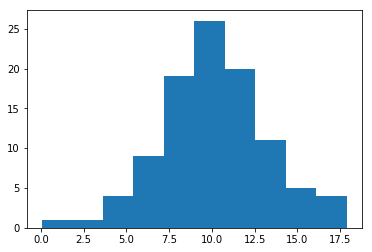

In [14]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

In [15]:
np.mean(x)

10.147389546015

In [64]:
np.std(x)

3.014695610662603

In [16]:
x[95:100] = 100 # 이상치 지정
x # e+02 = 10^2

array([1.17304392e+01, 1.63933264e+01, 1.73206590e+01, 1.07899806e+01,
       5.51163806e+00, 9.88979408e+00, 1.12920874e+01, 5.41157701e+00,
       7.80922097e+00, 1.31539457e+01, 1.48593780e+01, 5.18495989e+00,
       1.09930286e+01, 9.36714293e+00, 1.08945301e+01, 6.56177945e+00,
       1.17260861e+01, 8.90828010e+00, 1.01091976e+01, 8.43830804e+00,
       9.95270700e+00, 9.86247581e+00, 8.14476643e+00, 7.54049167e+00,
       1.15294257e+01, 1.31518183e+01, 1.04350957e+01, 8.97743181e+00,
       1.37323753e+01, 1.49674550e+01, 9.18100947e+00, 8.92022193e+00,
       7.33842885e-02, 1.31550968e+01, 9.32104691e+00, 8.01247213e+00,
       1.27391756e+01, 1.27635065e+01, 1.27163572e+01, 8.54749669e+00,
       7.85535142e+00, 1.05471619e+01, 1.17301502e+01, 5.30930238e+00,
       1.56590461e+01, 6.80288206e+00, 1.03384932e+01, 8.23193967e+00,
       1.19328003e+01, 1.09154191e+01, 1.18521557e+01, 1.32972652e+01,
       8.69230361e+00, 1.11955065e+01, 1.00184890e+01, 4.93669823e+00,
      

In [17]:
# 평균, 표준편차는 이상치의 영향을 많이 받는 것을 볼 수 있다
print(np.mean(x)) 
print(np.std(x))

14.717851743813155
19.790826557586872


(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([7.33842885e-02, 1.00660459e+01, 2.00587074e+01, 3.00513690e+01,
        4.00440306e+01, 5.00366921e+01, 6.00293537e+01, 7.00220153e+01,
        8.00146769e+01, 9.00073384e+01, 1.00000000e+02]),
 <a list of 10 Patch objects>)

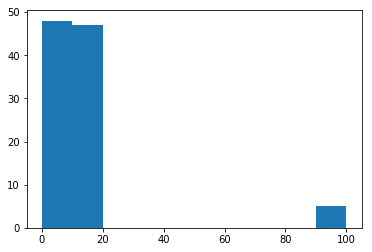

In [18]:
plt.hist(x)

(array([ 1.,  1.,  7.,  8., 29., 25., 14.,  6.,  4.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

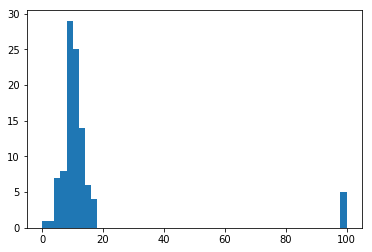

In [75]:
plt.hist(x, bins=np.arange(0, 101, 2)) # 0부터 100까지 2씩증가하는 구간 생성

(array([ 1.,  0.,  0.,  1.,  1.,  6.,  4.,  4., 15., 14., 13., 12.,  8.,
         6.,  4.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  

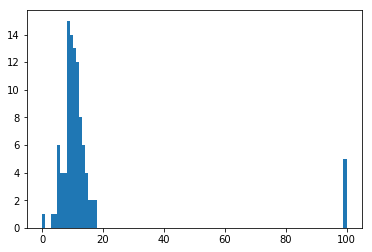

In [76]:
plt.hist(x, bins=np.arange(0, 101, 1))

In [19]:
print(x.shape) # 1차원
x = x.reshape(-1, 1) 
# (-1, 1) : 열은 1개인데 행은 알아서 계산해줘
# DL : -1 → None
print(x)
print(x.shape) # 2차원

(100,)
[[1.17304392e+01]
 [1.63933264e+01]
 [1.73206590e+01]
 [1.07899806e+01]
 [5.51163806e+00]
 [9.88979408e+00]
 [1.12920874e+01]
 [5.41157701e+00]
 [7.80922097e+00]
 [1.31539457e+01]
 [1.48593780e+01]
 [5.18495989e+00]
 [1.09930286e+01]
 [9.36714293e+00]
 [1.08945301e+01]
 [6.56177945e+00]
 [1.17260861e+01]
 [8.90828010e+00]
 [1.01091976e+01]
 [8.43830804e+00]
 [9.95270700e+00]
 [9.86247581e+00]
 [8.14476643e+00]
 [7.54049167e+00]
 [1.15294257e+01]
 [1.31518183e+01]
 [1.04350957e+01]
 [8.97743181e+00]
 [1.37323753e+01]
 [1.49674550e+01]
 [9.18100947e+00]
 [8.92022193e+00]
 [7.33842885e-02]
 [1.31550968e+01]
 [9.32104691e+00]
 [8.01247213e+00]
 [1.27391756e+01]
 [1.27635065e+01]
 [1.27163572e+01]
 [8.54749669e+00]
 [7.85535142e+00]
 [1.05471619e+01]
 [1.17301502e+01]
 [5.30930238e+00]
 [1.56590461e+01]
 [6.80288206e+00]
 [1.03384932e+01]
 [8.23193967e+00]
 [1.19328003e+01]
 [1.09154191e+01]
 [1.18521557e+01]
 [1.32972652e+01]
 [8.69230361e+00]
 [1.11955065e+01]
 [1.00184890e+01]
 [4

In [20]:
std_x = StandardScaler().fit_transform(x)
std_x # 표준화를 진행한 값 출력

array([[-0.15094936],
       [ 0.08465915],
       [ 0.13151584],
       [-0.19846928],
       [-0.46517581],
       [-0.24395432],
       [-0.1730986 ],
       [-0.47023174],
       [-0.34908248],
       [-0.07902176],
       [ 0.0071511 ],
       [-0.48168235],
       [-0.18820958],
       [-0.27036308],
       [-0.19318656],
       [-0.41211378],
       [-0.15116931],
       [-0.29354871],
       [-0.2328682 ],
       [-0.31729568],
       [-0.24077543],
       [-0.24533467],
       [-0.33212788],
       [-0.36266096],
       [-0.16110626],
       [-0.07912926],
       [-0.21640107],
       [-0.29005458],
       [-0.04979461],
       [ 0.01261207],
       [-0.27976812],
       [-0.29294531],
       [-0.7399624 ],
       [-0.0789636 ],
       [-0.27269224],
       [-0.33881251],
       [-0.09997946],
       [-0.09875006],
       [-0.10113244],
       [-0.31177854],
       [-0.34675158],
       [-0.21073854],
       [-0.15096396],
       [-0.47539952],
       [ 0.0475571 ],
       [-0

In [91]:
np.mean(std_x) # 0에 가깝게 나옴

5.329070518200751e-17

In [92]:
np.std(std_x) # 1에 가깝게 나옴

1.0

(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-0.7399624 , -0.23504859,  0.26986522,  0.77477902,  1.27969283,
         1.78460664,  2.28952044,  2.79443425,  3.29934806,  3.80426186,
         4.30917567]),
 <a list of 10 Patch objects>)

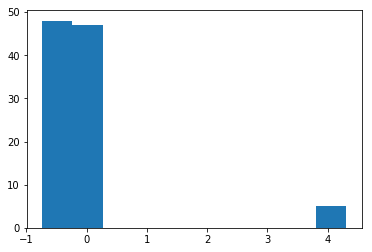

In [21]:
plt.hist(std_x)

In [22]:
std_o = std_x[std_x < 4] # 4보다 큰 이상치 제거
std_o

array([-0.15094936,  0.08465915,  0.13151584, -0.19846928, -0.46517581,
       -0.24395432, -0.1730986 , -0.47023174, -0.34908248, -0.07902176,
        0.0071511 , -0.48168235, -0.18820958, -0.27036308, -0.19318656,
       -0.41211378, -0.15116931, -0.29354871, -0.2328682 , -0.31729568,
       -0.24077543, -0.24533467, -0.33212788, -0.36266096, -0.16110626,
       -0.07912926, -0.21640107, -0.29005458, -0.04979461,  0.01261207,
       -0.27976812, -0.29294531, -0.7399624 , -0.0789636 , -0.27269224,
       -0.33881251, -0.09997946, -0.09875006, -0.10113244, -0.31177854,
       -0.34675158, -0.21073854, -0.15096396, -0.47539952,  0.0475571 ,
       -0.39993123, -0.22128225, -0.32772315, -0.14072436, -0.19213107,
       -0.14479921, -0.07178005, -0.30446167, -0.17797868, -0.23745157,
       -0.49422663, -0.23757914, -0.1187538 , -0.14885864, -0.39540999,
       -0.0806203 , -0.33765531, -0.33539694, -0.17154068, -0.28690257,
       -0.02598362, -0.21000934, -0.08832732, -0.24263435, -0.21

(array([ 1.,  1.,  4.,  8., 17., 24., 20., 11.,  5.,  4.]),
 array([-0.7399624 , -0.64998632, -0.56001024, -0.47003416, -0.38005809,
        -0.29008201, -0.20010593, -0.11012986, -0.02015378,  0.0698223 ,
         0.15979838]),
 <a list of 10 Patch objects>)

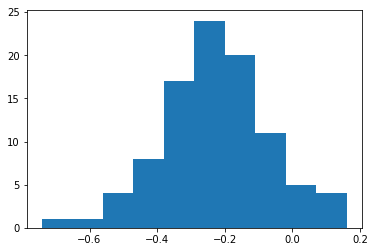

In [23]:
plt.hist(std_o)

(array([ 0.,  1.,  9., 45., 32.,  8.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 <a list of 9 Patch objects>)

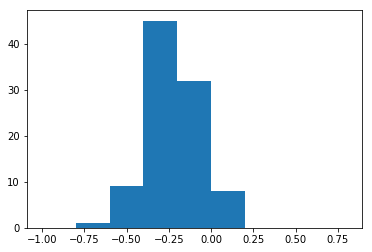

In [24]:
plt.hist(std_o, bins=np.arange(-1, 1, 0.2))

In [25]:
print("mean", np.mean(x))
print("median", np.median(x))
Q1 = np.percentile(x, 25) # Q1(25%) 
print("Q1", Q1)
Q3 = np.percentile(x, 75) # Q3(75%)
print("Q3", Q3)
IQR = Q3 - Q1
print("IQR", IQR)

mean 14.717851743813155
median 10.386794450839528
Q1 8.435859129640745
Q3 12.534014070784306
IQR 4.0981549411435605


In [26]:
rbs_x = RobustScaler().fit_transform(x)
rbs_x 

array([[ 3.27865765e-01],
       [ 1.46566736e+00],
       [ 1.69194788e+00],
       [ 9.83823630e-02],
       [-1.18959787e+00],
       [-1.21274179e-01],
       [ 2.20902557e-01],
       [-1.21401399e+00],
       [-6.28959499e-01],
       [ 6.75218799e-01],
       [ 1.09136517e+00],
       [-1.26931134e+00],
       [ 1.47928556e-01],
       [-2.48807460e-01],
       [ 1.23893718e-01],
       [-9.33350510e-01],
       [ 3.26803559e-01],
       [-3.60775612e-01],
       [-6.77370358e-02],
       [-4.75454548e-01],
       [-1.05922655e-01],
       [-1.27940169e-01],
       [-5.47082297e-01],
       [-6.94532739e-01],
       [ 2.78816023e-01],
       [ 6.74699692e-01],
       [ 1.17861007e-02],
       [-3.43901747e-01],
       [ 8.16362710e-01],
       [ 1.11773727e+00],
       [-2.94226304e-01],
       [-3.57861657e-01],
       [-2.51659840e+00],
       [ 6.75499676e-01],
       [-2.60055454e-01],
       [-5.79363727e-01],
       [ 5.74009819e-01],
       [ 5.79946854e-01],
       [ 5.6

In [134]:
print("median", np.median(rbs_x)) 
print("mean", np.mean(rbs_x))
print("std", np.std(rbs_x))

median 0.0
mean 1.0568310264435923
std 4.829204078863935


(array([48., 47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.]),
 array([-2.5165984 , -0.07826658,  2.36006523,  4.79839704,  7.23672886,
         9.67506067, 12.11339248, 14.5517243 , 16.99005611, 19.42838793,
        21.86671974]),
 <a list of 10 Patch objects>)

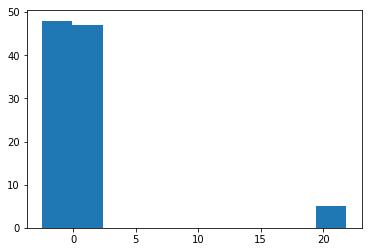

In [27]:
plt.hist(rbs_x)

(array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  2.,  4.,  4., 11.,
        12., 10., 11., 10.,  7.,  6.,  2.,  4.,  1.,  2.,  1.,  1.,  0.,
         0.,  0.,  0.]),
 array([-3.00000000e+00, -2.80000000e+00, -2.60000000e+00, -2.40000000e+00,
        -2.20000000e+00, -2.00000000e+00, -1.80000000e+00, -1.60000000e+00,
        -1.40000000e+00, -1.20000000e+00, -1.00000000e+00, -8.00000000e-01,
        -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,  2.66453526e-15,
         2.00000000e-01,  4.00000000e-01,  6.00000000e-01,  8.00000000e-01,
         1.00000000e+00,  1.20000000e+00,  1.40000000e+00,  1.60000000e+00,
         1.80000000e+00,  2.00000000e+00,  2.20000000e+00,  2.40000000e+00,
         2.60000000e+00,  2.80000000e+00]),
 <a list of 29 Patch objects>)

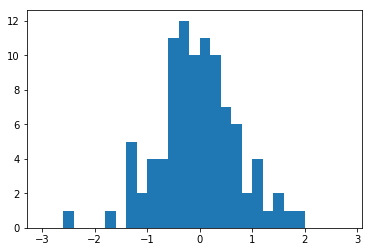

In [28]:
rbs_o = rbs_x[rbs_x < 5]
plt.hist(rbs_o, bins=np.arange(-3, 3, 0.2))

## 정규화 
(각 열의 요소값 - 각 열의 최소값) / (각 열의 최대값 - 각 열의 최소값) <br>
0 ~ 1 사이의 범위


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
x = np.array([[9, -9, 2],
              [5, 0, 1],
              [1, 10, 4],
              [4, 7, -2]])
x

array([[ 9, -9,  2],
       [ 5,  0,  1],
       [ 1, 10,  4],
       [ 4,  7, -2]])

In [34]:
x.min()

-9

In [35]:
x.max()

10

In [36]:
x.min(axis = 0)

array([ 1, -9, -2])

In [37]:
x.max(axis = 0)

array([ 9, 10,  4])

In [39]:
(x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) # 각 열의 최대값은 1로, 최소값은 0으로 바뀐다

array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [41]:
x_minmax = MinMaxScaler().fit_transform(x)
x_minmax

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

In [42]:
from sklearn.preprocessing import minmax_scale

In [43]:
minmax_scale(x)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.        , 0.66666667],
       [0.5       , 0.47368421, 0.5       ],
       [0.        , 1.        , 1.        ],
       [0.375     , 0.84210526, 0.        ]])

## 이항변수화 변환
연속형 변수 값 → 0 또는 1 (2가지)<br>
임계값threshhold을 기준으로 이진화

In [46]:
from sklearn.preprocessing import Binarizer

In [48]:
x = np.array([[5, -3, 2], 
              [7, -1, 0], 
              [0, 9, 5]])
x

array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])

In [50]:
Binarizer().fit(x) # default threshold = 0

Binarizer(copy=True, threshold=0.0)

In [54]:
# 3을 기준threshold
bnr = Binarizer(3).fit(x)
bnr
bnr.transform(x)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])

In [55]:
x

array([[ 5, -3,  2],
       [ 7, -1,  0],
       [ 0,  9,  5]])

In [56]:
# 2을 기준threshold
bnr = Binarizer(2).fit(x)
bnr
bnr.transform(x) # 2 이하는 0, 2 초과는 1

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 1]])